# 12012727 王铎磊

## LAB Assignment  
This lab introduces classical machine learning algorithms, decision trees (DTs) and their ensemble learning (e.g., Random Forests). Decision trees are important non-parameter learning methods. Although DTs are simple and limited, they still can achieve excellent performance using ensemble learning schemes.

For this lab assignment, we'll use the algorithms we've learned today to fit the model and evaluate the model’s prediction performance. The scikit-learn package will be used to save your time.


### Decision tree
- <font size=4>Step 1. load iris dataset </font>

Datasets: First, we load the scikit-learn iris toy dataset .

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

- <font size=4> Step 2. Define the features and the target </font>

In [2]:
X = iris.data
y = iris.target

- <font size=4> Step 3. Visualization </font>
  
    We need to use proper visualization methods to have an intuitive understanding.

    For visualization, only the last 2 attributes are used.


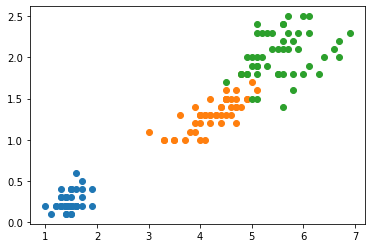

In [3]:
plt.scatter(X[y==0, 2], X[y==0, 3])
plt.scatter(X[y==1, 2], X[y==1, 3])
plt.scatter(X[y==2, 2], X[y==2, 3])
plt.show()

- <font size=4> Step 4. Preprocessing data </font>
Please check whether the data needs to be preprocessed

数据集中没有缺失数据，而且每一个 Feature 都是连续的数值型数据，因此不需要额外的数据处理.

- <font size=4> Step 5. Split the dataset into train and test sets </font>
  
 Now we divide the whole dataset into a training set and a test set using the the scikit-learn model_selection module.

In [4]:
########### Write Your Code Here ###########
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
############################################

- <font size=4> Step 6. Explore the model parameters </font>
  
Decision trees are quite easy to use, but they are prone to overfit the training data. Actually almost all the non-parameter learning methods suffer from this problem. We can use pruning to optimize our trained decision trees; we can also adjust the super parameters to avoid overfitting.

    The decision tree model  given by the `SkLearn`  is as follows:

    ```python
    DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
    ```
    There are so many arguments and they are all helpful in adjusting the algorithm parameters to achieve the balance between bias and variance.  
    Adjust these parameters: `criterion`,`max_depth`, `min_samples_leaf`,  `min_samples_split` , `max_leaf_nodes `,`min_impurity_split `
    and explain how it affects the bias and variance of the classification results. 







In [5]:
########### Write Your Code Here ###########
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

model = Pipeline([("tree", DecisionTreeClassifier())])

DecisionTreeClassifier

params = {"tree__criterion" : ["gini", "entropy", "log_loss"],
          "tree__max_depth": range(1, 5),
          "tree__min_samples_leaf": range(1, 10),
          "tree__max_leaf_nodes": range(2, 6),
          "tree__min_impurity_decrease": [x/10 for x in range(5)]}

grid_search = GridSearchCV(model, param_grid=params, cv=3)

grid_search.fit(X_train, y_train)
print(grid_search.best_score_, grid_search.best_params_)
print(grid_search.score(X_train, y_train))
############################################

0.9500000000000001 {'tree__criterion': 'gini', 'tree__max_depth': 2, 'tree__max_leaf_nodes': 3, 'tree__min_impurity_decrease': 0.0, 'tree__min_samples_leaf': 1}
0.9583333333333334


    Finally, select the best set of parameters for the following steps.

- <font size=4> Step 7. Use the model of your choice on the test set </font>


In [6]:
########### Write Your Code Here ###########
tree = DecisionTreeClassifier(criterion="gini", max_depth=3, max_leaf_nodes=4, min_impurity_decrease=0.0, min_samples_leaf=2)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
############################################

- <font size=4> Step 8. Evaluate the model </font>

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, r2_score

def getStdBias(y_true:np.array, y_pred:np.array):
    return np.std(y_true - y_pred)
    

def getVariance(y_true:np.array, y_pred:np.array):
    return np.var(np.square(y_true - y_pred))
        
        
def printScores(model):
    print("Accuracy in train set:", accuracy_score(y_train, model.predict(X_train)))
    print("Accuracy in test set:", accuracy_score(y_test, model.predict(X_test)))
    print("f1-score in test set:", f1_score(y_test, y_pred, average="weighted"))
    print("r2-score in test set:", r2_score(y_test, y_pred))
    print("Bias in train-set:", getStdBias(y_train, model.predict(X_train)))
    print("Bias in test-set:", getStdBias(y_test, model.predict(X_test)))
    print("Variance in train-set:", getVariance(y_train, model.predict(X_train)))
    print("Variance in test-set:", getVariance(y_test, model.predict(X_test)))
    print("Cross-Validation-Score:", np.average(cross_val_score(model, X, y, cv = 5)))


In [29]:
from sklearn.metrics import accuracy_score, f1_score, r2_score

printScores(tree)

Accuracy in train set: 0.9583333333333334
Accuracy in test set: 0.9666666666666667
f1-score in test set: 0.9665634674922601
r2-score in test set: 0.9516908212560387
Bias in train-set: 0.2025874296857203
Bias in test-set: 0.17950549357115012
Variance in train-set: 0.03993055555555557
Variance in test-set: 0.032222222222222215
Cross-Validation-Score: 0.96


- <font size=4> Step 9. Visual decision boundary and generated decision tree </font>

In [8]:
########### Write Your Code Here ###########
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, clf=tree)	
plt.title('Decision Tree Classifier')	
plt.show()	
############################################

### Random forest

In this section, you are required to use random forests for classification. Thus, in `scikit-learn`, there are two ways to implement a random forset, from the Bagging view and from the RF view.<br>
Classify `iris`  using `BaggingClassifier( )` and `RandomForestClassifier( )` respectively, 

- <font color=blue >**RF view:**</font> we construct a RF class directly.
  
```python
# Use Random Forest directly

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=300,
                                random_state=666, # random attributes subset
                                oob_score=True,
                                # n_jobs=-1
                               )
rf_clf.fit(X,y)
```

- <font color=blue face=雅黑>**Bagging view:**</font>  we use the bagging algorithm with a number of base learning algorithms of decision trees.
  
```python
# Use Random Forest from Bagging view

from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=300,
                                max_samples=300,
                                bootstrap=True, # using bootstrap sampling method
                                oob_score=True, # use oob data for scoring
                                # n_jobs=-1 # use paralell computing
                               )
bagging_clf.fit(X,y)
```

- Compare the performances of two  methods, and select different parameters for model  and evaluate the model using bias and variance


In [30]:
########### Write Your Code Here ###########
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,
                                random_state=57
                                # n_jobs=-1
                               )
rf_clf.fit(X_train, y_train)
printScores(rf_clf)

print()

bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=100,
                                bootstrap=True, # using bootstrap sampling method
                                oob_score=True, # use oob data for scoring
                                # n_jobs=-1 # use paralell computing
                               )
bag_clf.fit(X_train, y_train)
printScores(bag_clf)
############################################

Accuracy in train set: 1.0
Accuracy in test set: 0.9666666666666667
f1-score in test set: 0.9665634674922601
r2-score in test set: 0.9516908212560387
Bias in train-set: 0.0
Bias in test-set: 0.17950549357115012
Variance in train-set: 0.0
Variance in test-set: 0.032222222222222215
Cross-Validation-Score: 0.96

Accuracy in train set: 1.0
Accuracy in test set: 0.9666666666666667
f1-score in test set: 0.9665634674922601
r2-score in test set: 0.9516908212560387
Bias in train-set: 0.0
Bias in test-set: 0.17950549357115012
Variance in train-set: 0.0
Variance in test-set: 0.032222222222222215
Cross-Validation-Score: 0.9666666666666668


### Other ensemble learning
For classification, we have many models to choose . Please don't just pick a model to train and say it's good enough. We need to select models based on some metrics, such as choosing models with low bias and low variance.

In this part, you are required  to use `AdaBoost` and `Gradient boosting`.Compare their performances with decision tree and random forest, and finally select the best model  and the optimal  parameters for iris classification.




In [31]:
########### Write Your Code Here ###########
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
printScores(ada_clf)
############################################

Accuracy in train set: 0.975
Accuracy in test set: 0.9666666666666667
f1-score in test set: 0.9665634674922601
r2-score in test set: 0.9516908212560387
Bias in train-set: 0.15789412767913683
Bias in test-set: 0.17950549357115012
Variance in train-set: 0.024374999999999997
Variance in test-set: 0.032222222222222215
Cross-Validation-Score: 0.9466666666666667


In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier()

gbc_clf.fit(X_train, y_train)
printScores(gbc_clf)

Accuracy in train set: 1.0
Accuracy in test set: 0.9666666666666667
f1-score in test set: 0.9665634674922601
r2-score in test set: 0.9516908212560387
Bias in train-set: 0.0
Bias in test-set: 0.17950549357115012
Variance in train-set: 0.0
Variance in test-set: 0.032222222222222215
Cross-Validation-Score: 0.9600000000000002



<font size=4>Hint: About how to select models and parameters:</font>
- Select model using cross validation. Compare the scores in the training set and the validation set. If they are good enough, use the model in the test set.
- Calculate the bias and variance of each model to further analyze your chosen model.
- Select parameters using cross validation
  
### Questions:
(1) Can decision trees and random forests be used for unsupervised clustering or data dimension reduction? Why?

(2) What are the strengths of the decision tree/random forest methods; when do they perform well?

(3) What are the weaknesses of the decision tree/random forest methods; when do they perform poorly?

(4) What makes the decision tree/random forest a good candidate for the classification/regression problem, if you have enough knowledge about the data?

1. 不可以，算法需要提供标签，因此适用于监督学习.

2. 决策树模型可以用于小数据集，复杂度较小，速度较快；随机森林相比之下较好的解决了过拟合问题，并且能有效降低模型的方差，适用于高维数据，对于数据集的选择无需额外操作，泛化能力强.

3. 决策树容易过拟合，泛化能力较差，对于非分类问题不好，树结构简单，可理解程度高；随机森林计算量更大，计算代价更多，对于回归问题不好用，森林像是黑箱，可理解程度低.

4. 如果样本数据量小，且是分类问题，有明显的特征，可以考虑决策树模型.


## Conclusion
- Decision trees are prone to overfitting, but random forest algorithm prevents overfitting.
- Random forest algorithm is comparatively time-consuming, whereas decision tree algorithm gives fast results.
- There are many arguments for either base decision trees or the whole ensemble algorithm.  A good ensemble algorithm should make sure that base ones are both accurate and diversified.  So it is better to get a set of good enough base tree parameters before training the ensemble learning algorithm. 

## References
https://scikit-learn.org/stable/